In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load the Dataset

##### Link to dataset: https://www.cis.fordham.edu/wisdm/dataset.php

In [ ]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()             #read above mentioned file line by line
processedList= []

for i, line in enumerate(lines):
  try:
    line = line.split(',')          #splits each index at comma
    last = line[5].split(';')[0]    #splits each line at semi-colon and returns to zeroth index
    last = last.strip()             #removes white spaces
    if last == '':                  #if fifth index is an empty string then break the loop
      break;
    temp = [line[0], line[1], line[2], line[3], line[4], last]    #storing values of indexes in temp
    processedList.append(temp)              #appending values in an empty list

  except:
    print("Error at line: ", i)


Error at line:  0
Error at line:  42947
Error at line:  42948
Error at line:  42949


In [ ]:
processedList

[['36', 'Jogging', '13856242292000', '0.89', '8.89', '5.5162406'],
 ['36', 'Jogging', '13856292249000', '-4.21', '6.21', '-4.903325'],
 ['36', 'Jogging', '13856342267000', '-7.97', '14.14', '4.5219555'],
 ['36', 'Jogging', '13856392286000', '-3.68', '7.27', '-1.3756552'],
 ['36', 'Jogging', '13856442304000', '-13.17', '17.08', '8.049625'],
 ['36', 'Jogging', '13856492261000', '-7.65', '8.92', '-3.445948'],
 ['36', 'Jogging', '13856542310000', '9.15', '10.04', '5.325556'],
 ['36', 'Jogging', '13856602796000', '-9', '1.61', '0.88532263'],
 ['36', 'Jogging', '13856652204000', '-3.11', '-2.64', '-1.2666923'],
 ['36', 'Jogging', '13856702314000', '-5.94', '10.8', '-5.597963'],
 ['36', 'Jogging', '13856752210000', '7.16', '19.57', '-3.5276701'],
 ['36', 'Jogging', '13856802289000', '-10.92', '19.04', '5.366417'],
 ['36', 'Jogging', '13856852277000', '-7.89', '13.14', '11.686258'],
 ['36', 'Jogging', '13856902295000', '3.15', '3.64', '-3.0645783'],
 ['36', 'Jogging', '13856952253000', '-1.5',

In [ ]:
data_columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [ ]:
data = pd.DataFrame(data = processedList, columns = data_columns)
data.head()

,user,activity,time,x,y,z
0,36,Jogging,13856242292000,0.89,8.89,5.5162406
1,36,Jogging,13856292249000,-4.21,6.21,-4.903325
2,36,Jogging,13856342267000,-7.97,14.14,4.5219555
3,36,Jogging,13856392286000,-3.68,7.27,-1.3756552
4,36,Jogging,13856442304000,-13.17,17.08,8.049625


In [ ]:
data.shape

(104489, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104489 entries, 0 to 104488
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      104489 non-null  object
 1   activity  104489 non-null  object
 2   time      104489 non-null  object
 3   x         104489 non-null  object
 4   y         104489 non-null  object
 5   z         104489 non-null  object
dtypes: object(6)
memory usage: 4.8+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Jogging       41174
Walking       38295
Upstairs      11670
Downstairs     8925
Sitting        2500
Standing       1925
Name: activity, dtype: int64

### Balancing data

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104489 entries, 0 to 104488
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      104489 non-null  object 
 1   activity  104489 non-null  object 
 2   time      104489 non-null  object 
 3   x         104489 non-null  float64
 4   y         104489 non-null  float64
 5   z         104489 non-null  float64
dtypes: float64(3), object(3)
memory usage: 4.8+ MB


### Plotting data for each activity

In [ ]:
fs = 20

In [ ]:
activities = data['activity'].value_counts().index
activities

Index(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

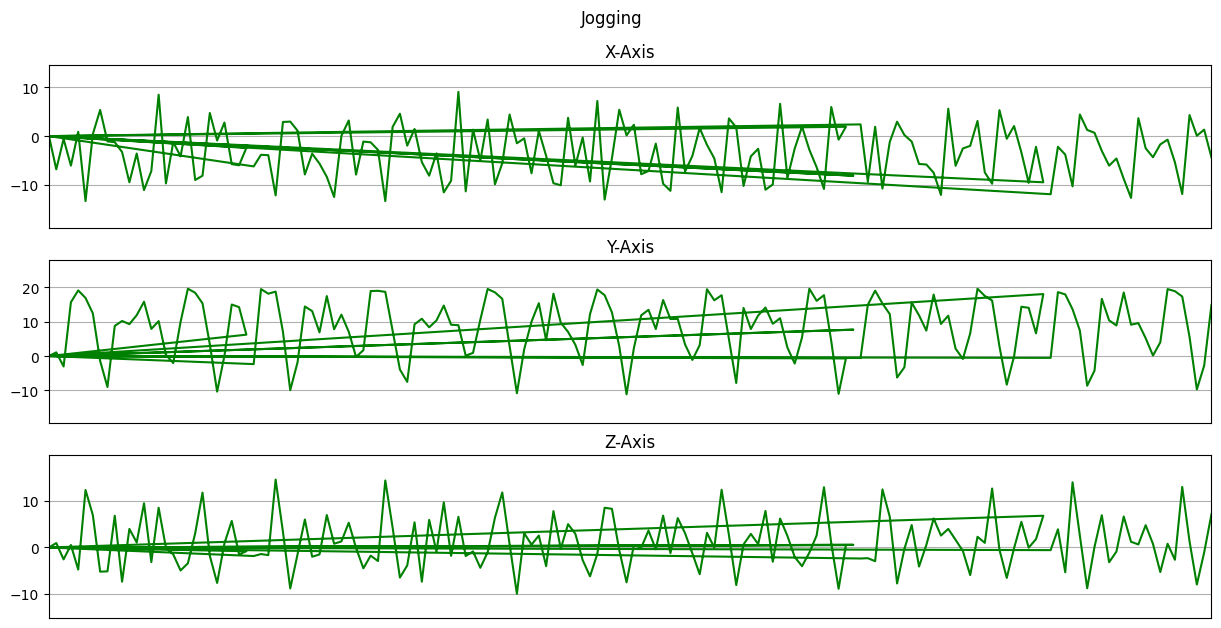

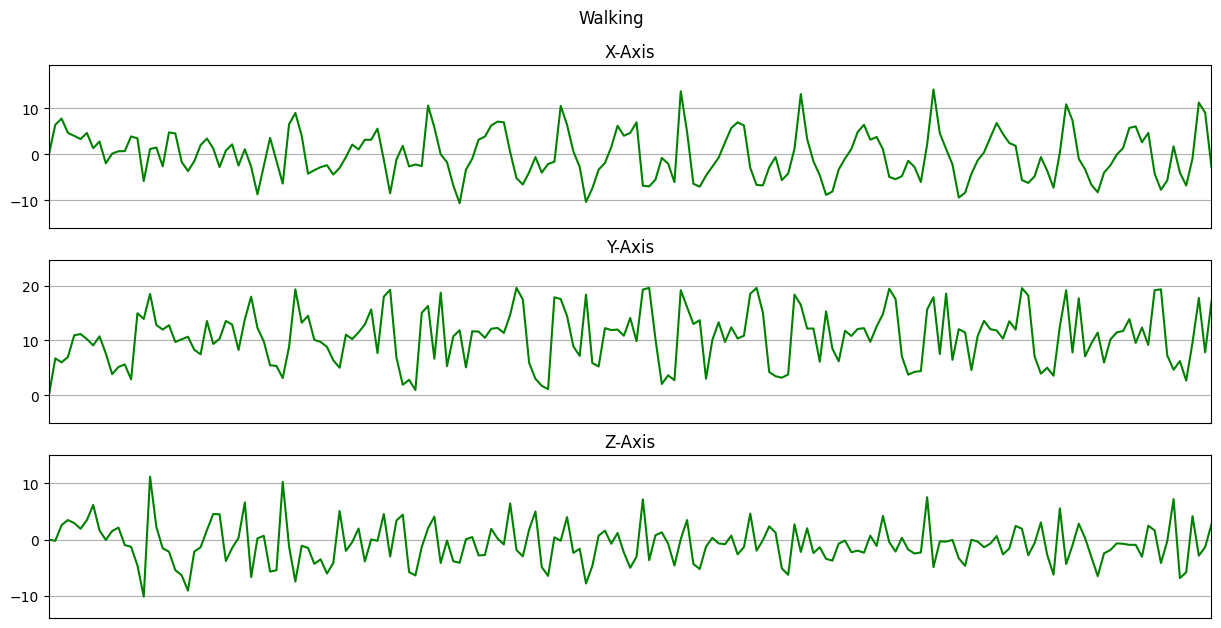

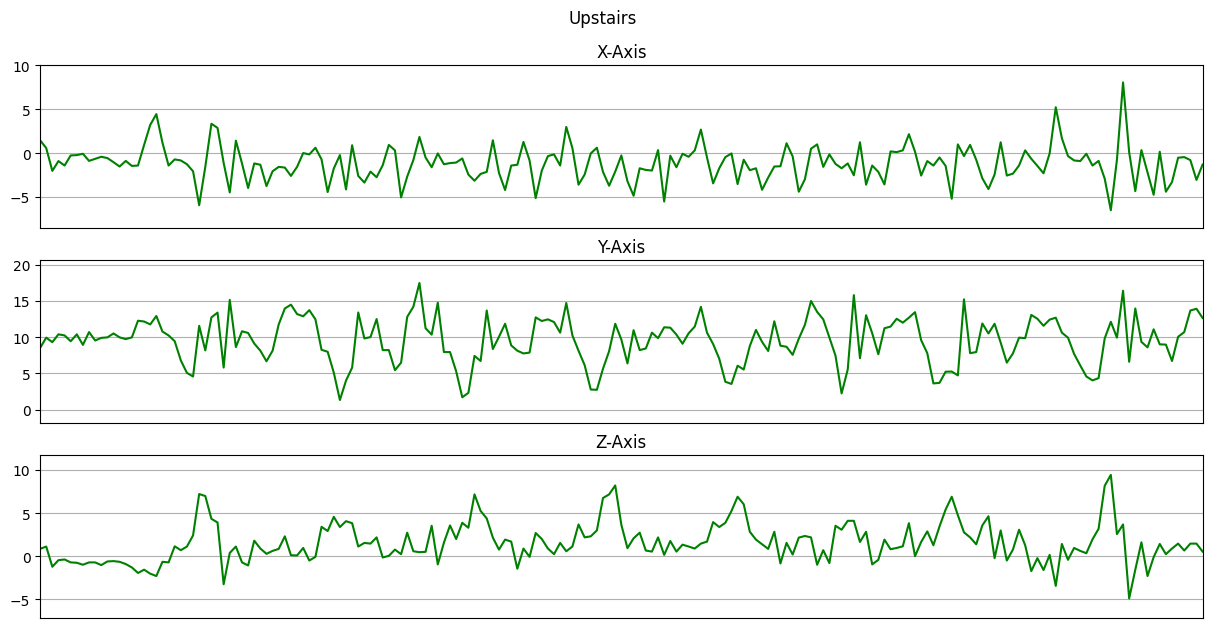

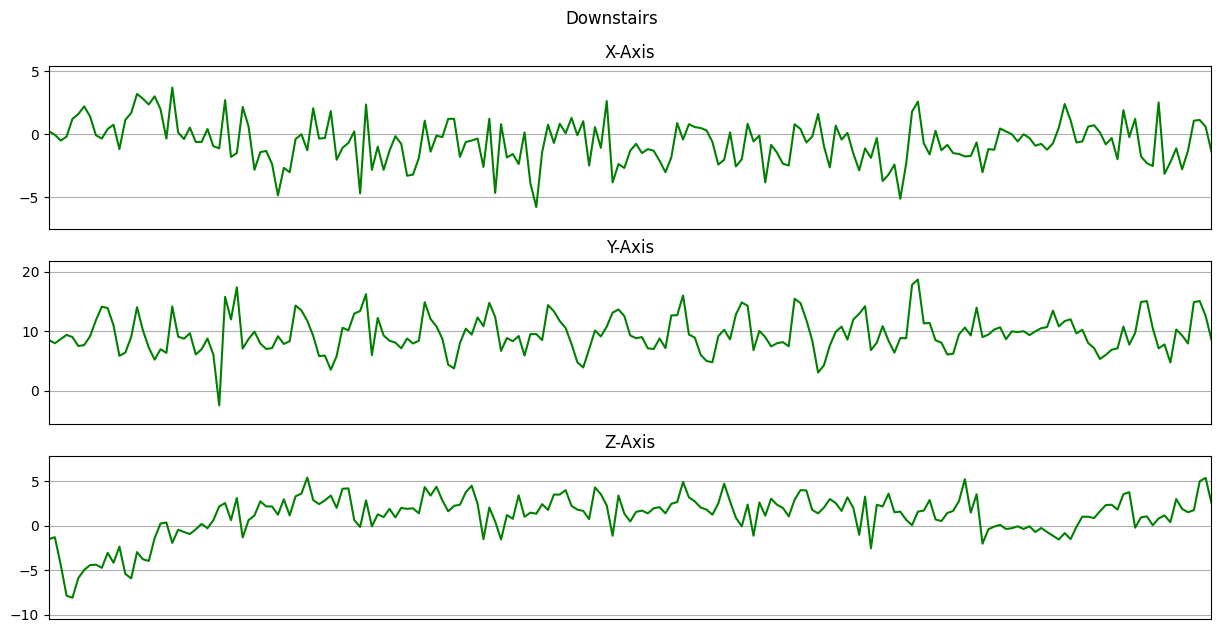

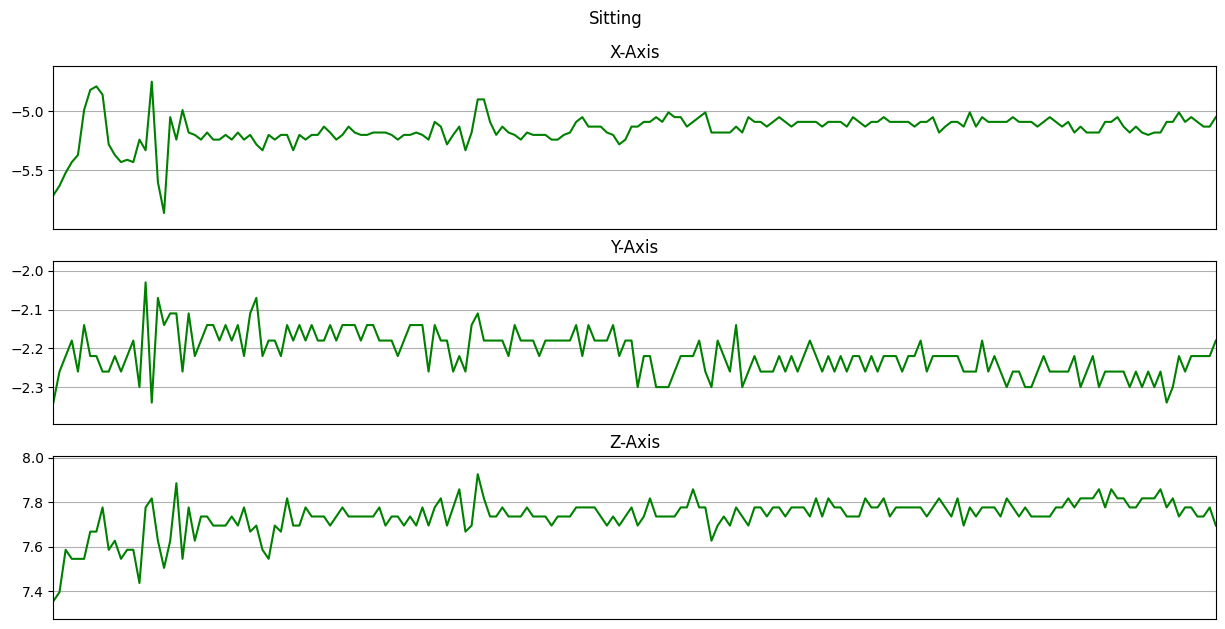

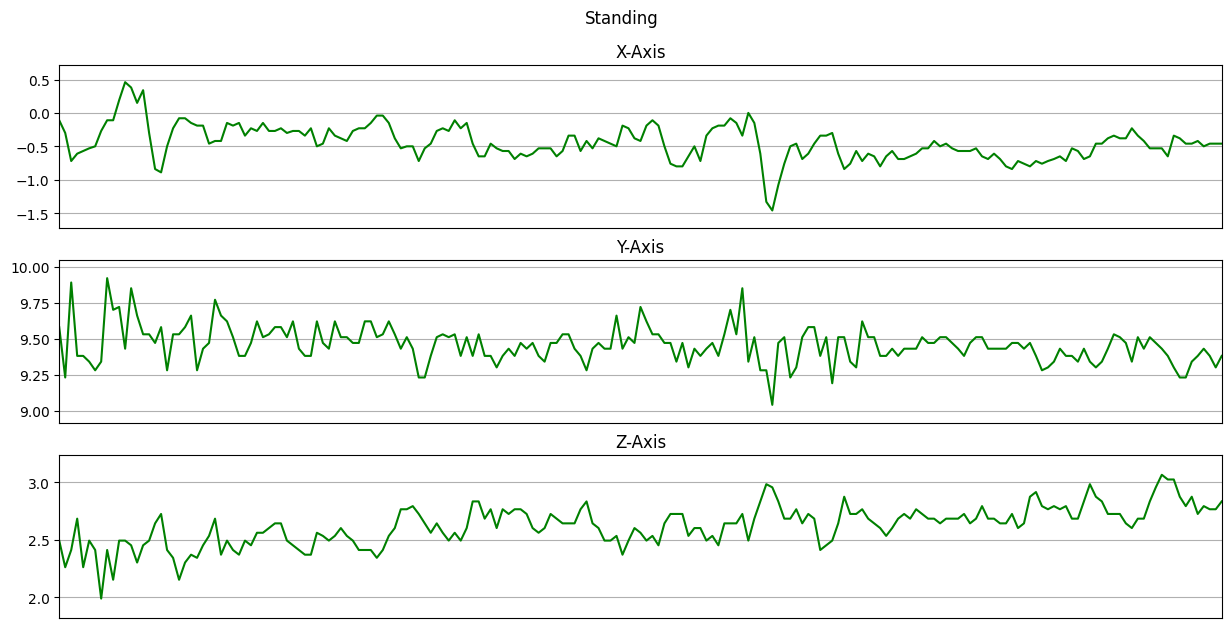

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax,x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:fs*10]
    plot_activity(activity, data_for_plot)


In [ ]:
df = data.drop(['user','time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,0.89,8.89,5.516241
1,Jogging,-4.21,6.21,-4.903325
2,Jogging,-7.97,14.14,4.521955
3,Jogging,-3.68,7.27,-1.375655
4,Jogging,-13.17,17.08,8.049625


#### Check for the category with least number of samples and slice the data of other categories to get the same number of sample for each category to reduce overfitting.

In [ ]:
df['activity'].value_counts()

Jogging       41174
Walking       38295
Upstairs      11670
Downstairs     8925
Sitting        2500
Standing       1925
Name: activity, dtype: int64

In [ ]:
Jogging = df[df['activity']=='Jogging'].head(1925).copy()
Walking = df[df['activity']=='Walking'].head(1925).copy()
Upstairs = df[df['activity']=='Upstairs'].head(1925).copy()
Downstairs = df[df['activity']=='Downstairs'].head(1925).copy()
Sitting = df[df['activity']=='Sitting'].head(1925).copy()
Standing = df[df['activity']=='Standing'].head(1925).copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Jogging, Walking, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

<ipython-input-71-0803a28cfff3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Jogging, Walking, Upstairs, Downstairs, Sitting, Standing])


(11550, 4)

In [ ]:
balanced_data['activity'].value_counts()

Jogging       1925
Walking       1925
Upstairs      1925
Downstairs    1925
Sitting       1925
Standing      1925
Name: activity, dtype: int64

In [ ]:
balanced_data.head()

,activity,x,y,z
0,Jogging,0.89,8.89,5.516241
1,Jogging,-4.21,6.21,-4.903325
2,Jogging,-7.97,14.14,4.521955
3,Jogging,-3.68,7.27,-1.375655
4,Jogging,-13.17,17.08,8.049625


### Now converting string into Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data 

,activity,x,y,z,label
0,Jogging,0.89,8.89,5.516241,1
1,Jogging,-4.21,6.21,-4.903325,1
2,Jogging,-7.97,14.14,4.521955,1
3,Jogging,-3.68,7.27,-1.375655,1
4,Jogging,-13.17,17.08,8.049625,1
...,...,...,...,...,...
18391,Standing,-0.91,9.43,2.533385,3
18392,Standing,-1.18,9.51,2.492524,3
18393,Standing,-1.50,9.53,2.533385,3
18394,Standing,-2.07,8.77,2.179256,3


In [ ]:
label.classes_

#x,y,z are out input features and label is our output/predictor

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### Standardizing Data

In [ ]:
X = balanced_data[['x', 'y', 'z']]   #input features
y = balanced_data['label']     #output label

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.766797,0.236676,0.808533,1
1,-0.659367,-0.219661,-1.906236,1
2,-1.710813,1.130621,0.549476,1
3,-0.511158,-0.039169,-0.987118,1
4,-3.164941,1.631231,1.468594,1
...,...,...,...,...
11545,0.263445,0.328625,0.031364,3
11546,0.187942,0.342247,0.020717,3
11547,0.098457,0.345653,0.031364,3
11548,-0.060938,0.216243,-0.060903,3


### Frame Preparation

In [ ]:
import scipy.stats as stats

In [ ]:
fs = 20
frame_size = fs*4   #80 x 3 samples
hop_size = fs*2   #jump of 40 data samples


In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels


In [ ]:

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape      #(1925*6)/40 = 288      

<ipython-input-87-351285eacf6e>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['label'][i: i + frame_size])[0][0]


((287, 80, 3), (287,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((229, 80, 3), (58, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

###Reshaping because CNN accepts 3-D data

In [ ]:
X_train = X_train.reshape(229, 80, 3, 1)
X_test = X_test.reshape(58, 80, 3, 1)

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2-D CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
8/8 [==============================] - 2s 58ms/step - loss: 1.5883 - accuracy: 0.3057 - val_loss: 1.2247 - val_accuracy: 0.4310
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 1.1553 - accuracy: 0.5590 - val_loss: 0.9894 - val_accuracy: 0.7759
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 0.9973 - accuracy: 0.6594 - val_loss: 0.8083 - val_accuracy: 0.7586
Epoch 4/10
8/8 [==============================] - 0s 19ms/step - loss: 0.7372 - accuracy: 0.7511 - val_loss: 0.5901 - val_accuracy: 0.9310
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 0.6031 - accuracy: 0.8035 - val_loss: 0.4637 - val_accuracy: 0.9483
Epoch 6/10
8/8 [==============================] - 0s 19ms/step - loss: 0.4857 - accuracy: 0.8253 - val_loss: 0.3596 - val_accuracy: 0.9310
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 0.3927 - accuracy: 0.8908 - val_loss: 0.2936 - val_accuracy: 0.9483
Epoch 8/10
8/8 [===========

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

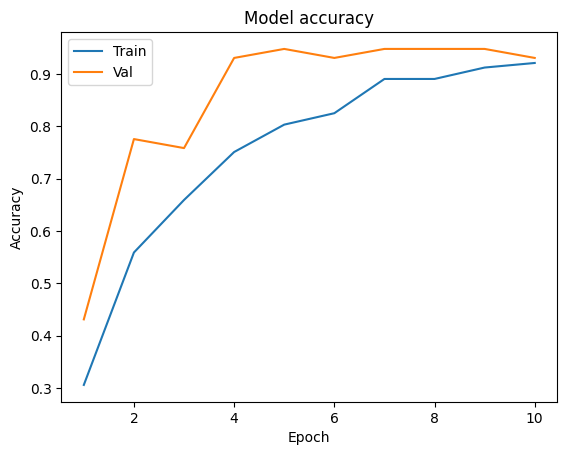

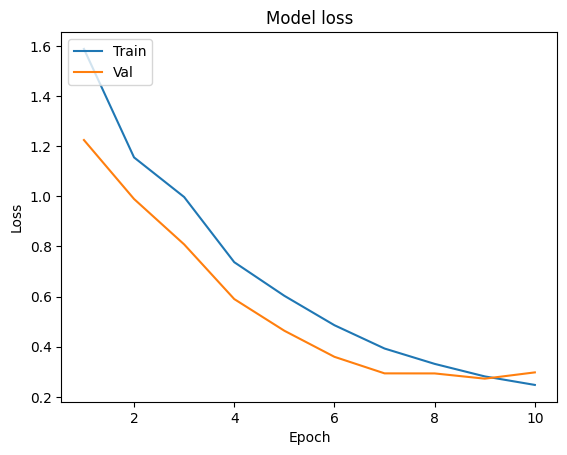

In [108]:
plot_learningCurve(history, 10)

In [109]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [110]:
y_pred_prob = model.predict(X_test) # predict the probabilities for each class
y_pred = y_pred_prob.argmax(axis=-1) # find the class with the highest probability

2/2 [==============================] - 0s 6ms/step


In [113]:
import seaborn as sns

Text(58.22222222222221, 0.5, 'Actual')

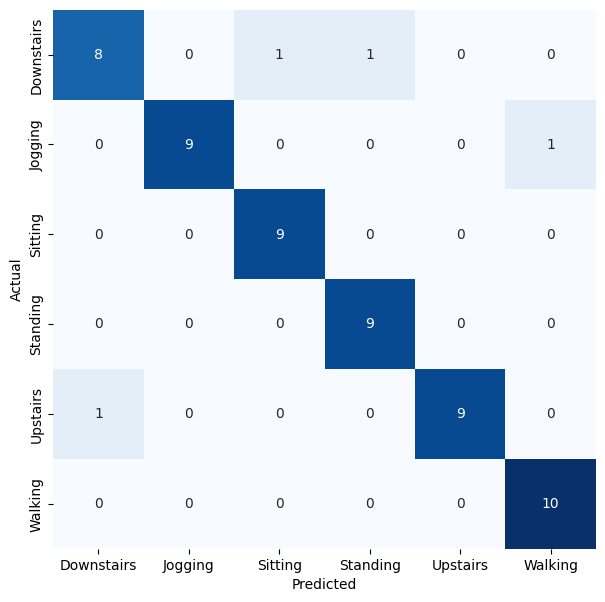

In [114]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(mat, annot=True, fmt='d', cmap=plt.cm.Blues, ax=ax, cbar=False, 
            xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')